# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'e316f91094d626c046b3077c84c0d13e'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name = []
country = []
max_temp = []
wind_speed = []
cloudiness = []
humidity = []
lat = []
long = []
date = []

In [6]:
record_value = 0
set_value = 1

In [7]:
for city in cities:
        
    try:          
        payload = {
            "appid": api_key,
            "q": city,
            "units": "imperial"
        }
        r = requests.get(url, params=payload).json()
        city_name.append(r["name"])
        country.append(r["sys"]["country"])
        max_temp.append(r["main"]["temp_max"])
        wind_speed.append(r["wind"]["speed"])
        cloudiness.append(r["clouds"]["all"])
        humidity.append(r["main"]["humidity"])
        lat.append(r["coord"]["lat"])
        long.append(r["coord"]["lon"])
        date.append(r["dt"])
        
        if record_value < 50:
            print("Processing Record " + str(record_value) + " of Set " + str(set_value) + " | " + city + ", " + str(r["id"]))
            record_value += 1
        else:
            record_value = 0
            set_value += 1
            
        
    except:
        print("City not found. Skipping...")

Processing Record 0 of Set 1 | eidfjord, 3158668
Processing Record 1 of Set 1 | hermanus, 3366880
Processing Record 2 of Set 1 | punta arenas, 3874787
Processing Record 3 of Set 1 | kargat, 1504380
Processing Record 4 of Set 1 | buraydah, 107304
City not found. Skipping...
Processing Record 5 of Set 1 | ilulissat, 3423146
Processing Record 6 of Set 1 | ushuaia, 3833367
Processing Record 7 of Set 1 | tazovskiy, 1489853
Processing Record 8 of Set 1 | dzilam gonzalez, 3529654
Processing Record 9 of Set 1 | hilo, 5855927
Processing Record 10 of Set 1 | sorland, 3137469
Processing Record 11 of Set 1 | podgorica, 3193044
Processing Record 12 of Set 1 | vaini, 1273574
Processing Record 13 of Set 1 | tiksi, 2015306
Processing Record 14 of Set 1 | evensk, 2125693
Processing Record 15 of Set 1 | vila velha, 6320062
Processing Record 16 of Set 1 | mataura, 6201424
Processing Record 17 of Set 1 | kieta, 2094027
Processing Record 18 of Set 1 | castro, 3896218
Processing Record 19 of Set 1 | ambon, 

In [8]:
len(city_name)

524

In [9]:
weather_data = pd.DataFrame({"Name": city_name,
              "Country": country,
              "Latitude": lat,
              "Longitude": long,
              "Max Temperature": max_temp,
              "Cloudiness": cloudiness,
              "Date": date,
              "Humidity": humidity,
              "Wind Speed": wind_speed,
})
weather_data


Name Country  Latitude  Longitude  Max Temperature  Cloudiness  \
0        Eidfjord      NO     60.47       7.07            37.99         100   
1        Hermanus      ZA    -34.42      19.24            63.00         100   
2    Punta Arenas      CL    -53.16     -70.91            46.40          40   
3          Kargat      RU     55.19      80.28            14.14         100   
4        Buraydah      SA     26.33      43.97            39.20           0   
..            ...     ...       ...        ...              ...         ...   
519          Rome      IT     41.89      12.48            44.60           0   
520    Nekrasovka      RU     48.35     135.23             6.80           8   
521     Ostrovnoy      RU     68.05      39.51            12.79          94   
522  Magistralnyy      RU     56.17     107.45             5.29           0   
523       Balabac      PH      7.99     117.06            83.61          37   

           Date  Humidity  Wind Speed  
0    1578280933        83        2.64  
1    1578280410        94        9.78  
2    1578280389        61       12.75  
3    1578280934        95       10.04  
4    1578280461        86        4.14  
..          ...       ...         ...  
519  1578280459        59        3.36  
520  1578281019        60        2.24  
521  1578280598        84       15.73  
522  1578280991        91        5.32  
523  1578281019        72       15.48  

[524 rows x 9 columns]

In [10]:
weather_data.to_csv("Weather_Data")

#### Position of City Plot

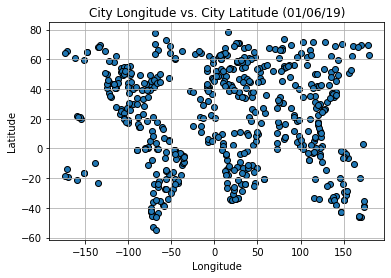

In [11]:
plt.title("City Longitude vs. City Latitude (01/06/19)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")

plt.grid()

plt.scatter(weather_data["Longitude"],
            weather_data["Latitude"],
           edgecolors='black')

plt.savefig("Lat_v_Long.png")
plt.show()

In [12]:
size_bins = [-90, -54, -18, 18, 54, 90]
group_names = ["asf1","2asdf", "3asdf", "4asdf", "asdf5"]
weather_data["Lat"] = pd.cut(weather_data["Latitude"], bins= size_bins, labels = group_names)

In [13]:
weather_data.groupby("Lat").count()

Name  Country  Latitude  Longitude  Max Temperature  Cloudiness  Date  \
Lat                                                                            
asf1      1        1         1          1                1           1     1   
2asdf    84       84        84         84               84          84    84   
3asdf   143      143       143        143              143         143   143   
4asdf   196      196       196        196              196         196   196   
asdf5   100      100       100        100              100         100   100   

       Humidity  Wind Speed  
Lat                          
asf1          1           1  
2asdf        84          84  
3asdf       143         143  
4asdf       196         196  
asdf5       100         100

#### Latitude vs. Temperature Plot

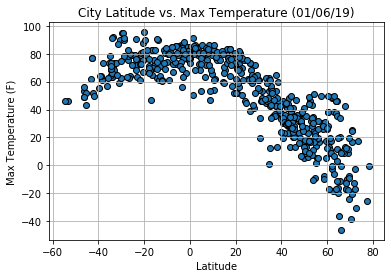

In [14]:
plt.title("City Latitude vs. Max Temperature (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Max Temperature"],
           edgecolors='black')

plt.savefig("Lat_v_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

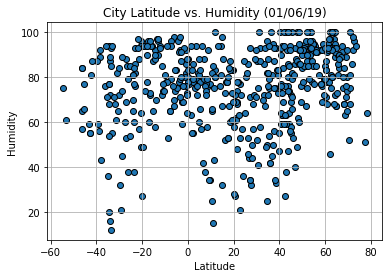

In [15]:
plt.title("City Latitude vs. Humidity (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Humidity"],
           edgecolors='black')

plt.savefig("Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

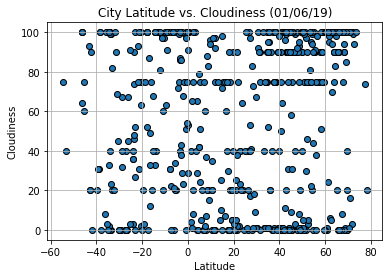

In [16]:
plt.title("City Latitude vs. Cloudiness (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Cloudiness"],
           edgecolors='black')

plt.savefig("Lat_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

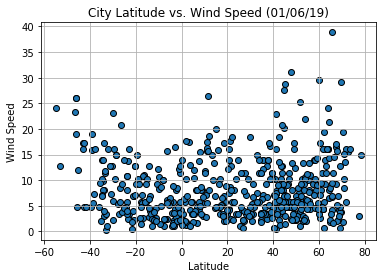

In [17]:
plt.title("City Latitude vs. Wind Speed (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Wind Speed"],
           edgecolors='black')

plt.savefig("Lat_v_Windspeed.png")
plt.show()

## Analysis

* Based on the Latitude vs. Temperature graph there seems to be a peak around 0 degrees latitude which makes sense because that would be the equator of the globe. What makes this data interesting is that at the same distance either direction from latitude (60 Degrees), the graphs temperature is lower in the norther hemisphere. This of course can be explained by the northern hemisphere being in winter season while the souther has its summer. 
* The City Longitude vs. City Latitude grapgh shows the random locations of the city that were pulled from the API. By looking at the wind speed, cloudiness, and humidity there does not seem to be a strong coorelation between these variables and the latiude.
* The Humidity graph does show that most of the data points range in a 60 to 100% Humidity. This could be due to the fact that most of the citys are close to a body of water. The longitutde vs. latitude graph is a cool represenation of where all the cities are and shows us that cities could be close to the water since it outlines the continents of the globe.